# DTSC-670 Foundations of Machine Learning Models 
## End-to-end Machine Learning project
Note: This is Using Modified Data to Differentiate from DTSC-670 solutions

## Common Imports

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

**<u>Important</u>**

In order for your output to match what is shown during the video walk-through of these notebooks, we strongly suggest that you create a virtual environment with the library versions shown below.  Over time, as packages get updated, this could cause code to stop working if you are working with a different version than the one used in this video.  Please note that our GA's are not able to support deprecation issues or issues with different output due to different packages.  Using virtual environments is standard industry practice when working on a project, and I would suggest that you begin getting into the habit now.  

To learn more about how to set up a virtual environment for your work, please look at Python's documentation here: [Installing packages using pip and virtual environments](https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/)

The versions of packages used during this course is:
- numpy version: 1.24.4
- pandas version: 2.0.3
- sklearn version: 1.3.0

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import pandas as pd
import numpy as np

Below I will confirm the versions of my imported libraries

In [4]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)

numpy version:  1.26.4
pandas version:  2.2.2
sklearn version:  1.5.1


To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed.

In [5]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the textbook, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. If you're running this notebook on Colab, the variable is already set for you.

## The Power and Danger of Interactivity

> Jupyter notebooks are interactive, and that’s a great thing: you can run each
cell one by one, stop at any point, insert a cell, play with the code, go back
and run the same cell again, etc., and I highly encourage you to do so. If you
just run the cells one by one without ever playing around with them, you
won’t learn as fast. However, this flexibility comes at a price: it’s very easy
to run cells in the wrong order, or to forget to run a cell. If this happens, the
subsequent code cells are likely to fail. For example, the very first code cell
in each notebook contains setup code (such as imports), so make sure you run
it first, or else nothing will work 

In [7]:
text = 'Eastern University'

In [8]:
print(text)

Eastern University


In [9]:
text = "Data Science"

In [10]:
print(text)

Data Science


# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

In [12]:
# make sure csv file is in same location as notebook
housing = pd.read_csv('housing_modified.csv')

## Take a Quick Look at the Data Structure

In [13]:
# view the columns and the first five rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,45.054099,880.0,113.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,19.719811,7099.0,969.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,49.949069,1467.0,186.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.000000,1274.0,275.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.000000,1627.0,244.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# notice total instances, counts in each column, and data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# check the ocean_proximity counts
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [16]:
# check the summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,29.963974,2635.763081,564.933588,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.798517,2181.615252,449.673781,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,20.112985,1447.750000,307.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,30.264532,2127.000000,455.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,39.640040,3148.000000,680.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6425.000000,35682.000000,6082.000000,15.000100,500001.000000


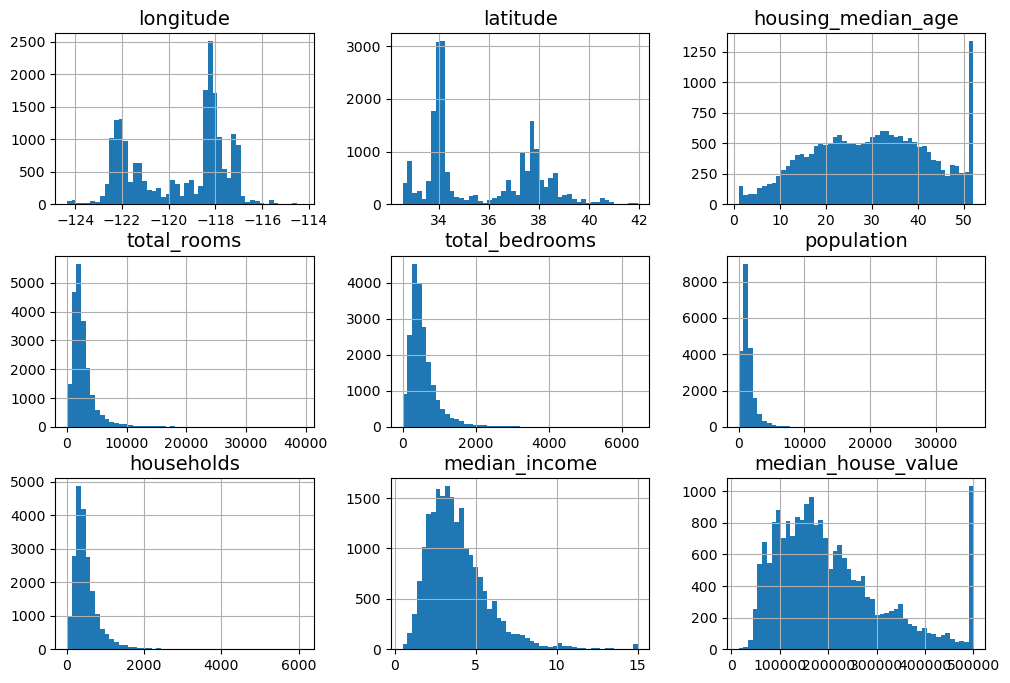

In [17]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
housing.hist(bins=50, figsize=(12, 8))
plt.show()

Looking at the histograms, take notice of the following:

1) The median income isn't expressed in US dollars
   - data has been scaled and capped at 15 (actually 15.0001) for higher incomes
   - data has been scaled and capped at 0.5 (actually 0.4999) for lower incomes
   - Example: 3 represents \\$30,000  / 10 represents \\$100,000   
&nbsp;
2) The housing median age and the housing median value were also capped (see tall bar at the end of the graph). The median value could be a problem since this is your target and your model might learn that prices never go beyond \\$500,000. 
    - collect proper labels for districts that were capped
    - remove those districts from the training and test set  
&nbsp;  
3) These attributes have very different scales.  We'll discuss feature scaling later.  
&nbsp;  

4) Many of the histograms are skewed right.  We'll discuss ways to transform these attributes later.  
&nbsp;  
**Wait!!!** Before we go any further, we will need to create a test set so that we do not create any *data snooping bias*.

## Create a Test Set

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  This function includes a a random_state parameter that allows you to set the random generator seed. It also allows you to pass multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels):

### Random Sampling

In [18]:
# split into training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,40.783792,6001.0,1118.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,11.026654,901.0,146.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,24.161642,6909.0,1525.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,26.805516,4021.0,652.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.971498,240.0,49.0,63.0,24.0,1.4688,53800.0,INLAND


In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,7.975099,2281.0,540.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,36.438406,1207.0,241.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,35.781879,3089.0,372.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,21.883677,4780.0,1463.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,38.740893,2127.0,494.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


### Stratified Sampling

The median income attribute is an important feature in the prediction of house prices.  We want to ensure that the test set is representative of the various categories of income so that it better reflects real world situations that your model might see in the future.

In [21]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

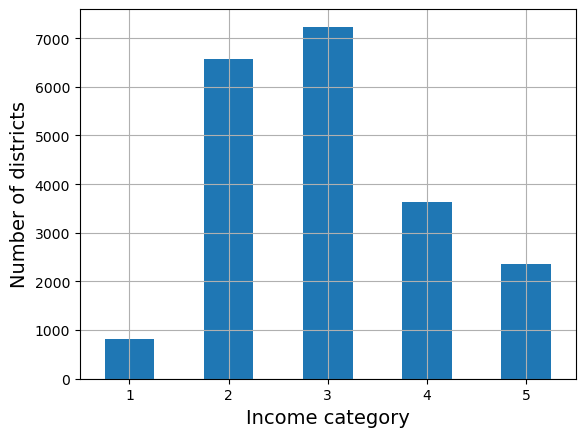

In [22]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

The textbook covers various ways to get this stratified shuffle split, and you can read more about those options.  One of the easiest options is to use the `stratify` argument in the `train_test_split` function.

In [23]:
# stratified sampling train test split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [24]:
# check income category proportions
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [25]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [26]:
# drop the 'income_cat' attribute since it is no longer needed
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Now we are ready to move on to exploring our data.

# Discover and Visualize the Data to Gain Insights
Next, we want to explore the training data in more depth.  But first, let's make sure that we are only using our training data and not our full `housing` data.

In [27]:
# copy training data to our 'housing' variable
# allows us to revert back to the original training data if needed
housing = strat_train_set.copy()

## Visualizing Geographical Data
We won't spend a lot of time in this class on data visualizations, but one of the first things that you should always do is to visualize your data.  Note that we will not spend a lot of time on the matplotlib code, but it is strongly encouraged that you take time to understand it and look at the documentation if you have any questions.

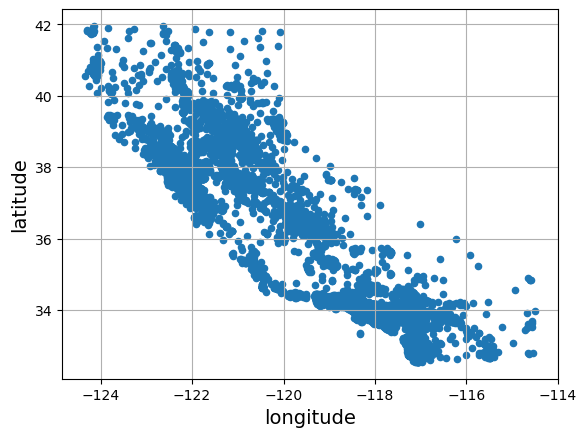

In [28]:
# create scatterplot of all districts
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

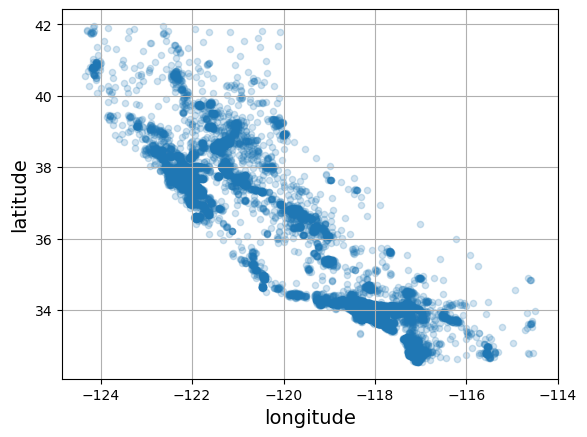

In [29]:
# setting the alpha allows us to see high-density areas better
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

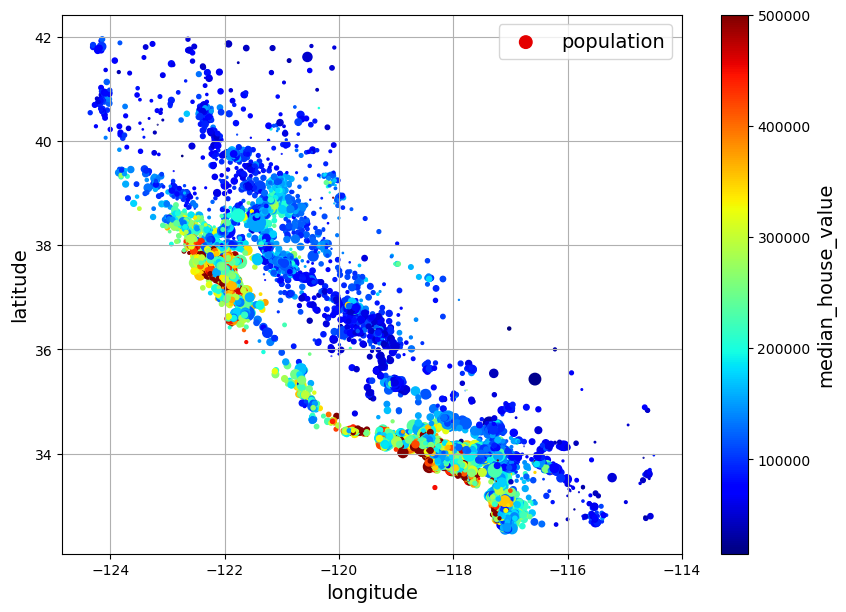

In [30]:
# radius(option s)- population
# color(option c)- price
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

## Looking for Correlations
We can compute the standard correlation coefficient between every pair of attributes since the dataset is not too large.

In [31]:
num_cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income','median_house_value']

# compute correlations
corr_matrix = housing[num_cols].corr()

In [32]:
# check how much each attribute correlates with the median house value
# remember that 1 is a strong positive correlation, -1 is a strong negative correlation, and 0 is no linear correlation
# median_income has a strong positive correlation
# latitude has slight negative correlation - prices get slightly lower as you go north

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.096058
households            0.071426
total_bedrooms        0.052525
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

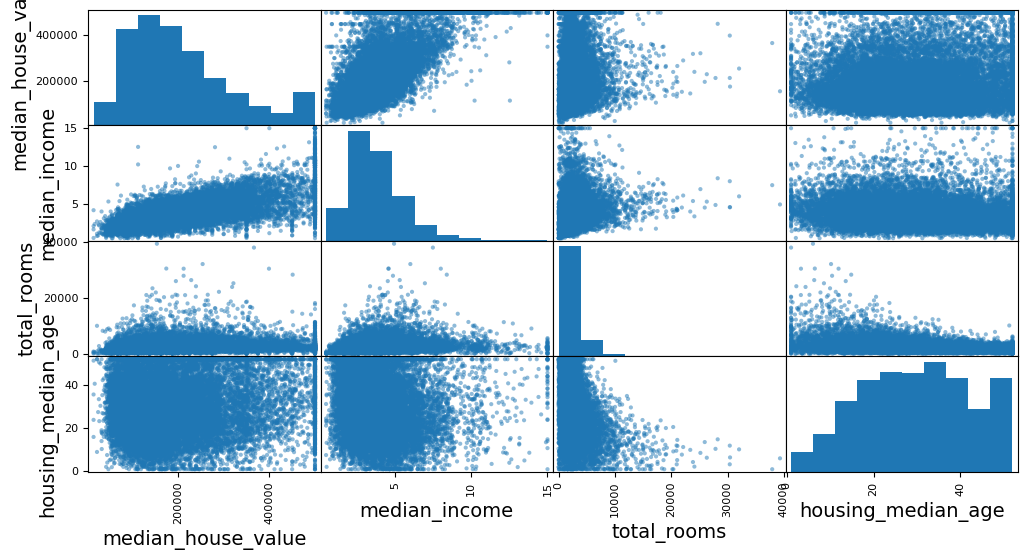

In [33]:
# plots every numerical attribute against every other numerical attribute
from pandas.plotting import scatter_matrix

# need to reduce attributes so that it fits on screen
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

# plots scatterplots and histograms when variable is compared against itself
scatter_matrix(housing[attributes], figsize=(12, 6))
plt.show()

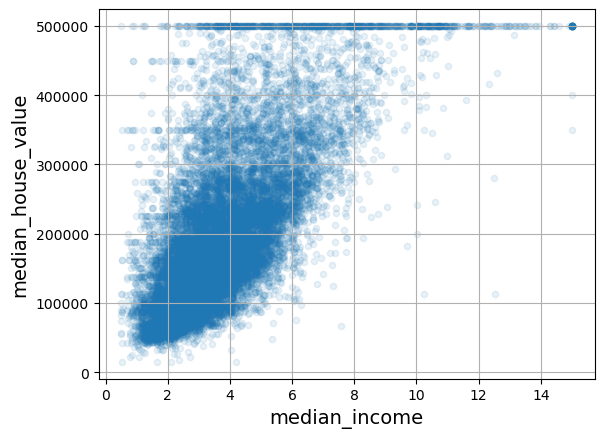

In [34]:
# most promising attribute to predict house prices
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

We can notice a quite strong correlation between median income and a district's median house value.  We can also see the horizontal line at $500,000 where the prices are capped along with lighter lines at various intervals in the plot.  We may need to think about removing those corresponding districts to prevent our algorithm from trying to reproduce them.

## Experimenting with Attribute Combinations
Before preparing our data for machine learning algorithms, we can next determine if any attribute combinations might be useful. 

In [35]:
# rooms per household
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

# bedrooms compared to number of rooms
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

# population per household
housing["people_per_house"] = housing["population"] / housing["households"]

In [36]:
# check correlation matrix again with new attributes
num_cols_new_attr = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income','median_house_value','rooms_per_house','bedrooms_ratio','people_per_house']

corr_matrix = housing[num_cols_new_attr].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.096058
households            0.071426
total_bedrooms        0.052525
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.239658
Name: median_house_value, dtype: float64

We can see that the `bedrooms_ratio` is more correlated than just when we look at total bedrooms alone.  Houses with lower bedroom to total rooms ratio tend to be more expensive. (Note: Prof. Andrews accidentally said the opposite in the video)  

Also notice that the `rooms_per_house` attribute is slightly more correlated than total rooms.  The larger the houses, the more expensive they are.

# Prepare the Data for Machine Learning Algorithms

We'll now work on preparing the data for our machine learning algorithm.  For those of you that took the DTSC-580 Data Manipulation course, you know that data preparation is a large part of the machine learning process, and it can get very complex.  If you were working on this project in the real world, you probably would have already done quite a bit of data manipulation before you even got to this point.

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [38]:
# reverting back to original training set - this is my features
housing = strat_train_set.drop("median_house_value", axis=1)

# this is my labels
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [39]:
# creates a Series of True/False values if there is a null value in a column
null_rows_idx = housing.isnull().any(axis=1)

# selecting only the rows with null values
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,16.277390,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.975767,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,40.499469,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,19.900352,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,5.237891,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [40]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [41]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,16.277390,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.975767,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,40.499469,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,19.900352,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,5.237891,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [42]:
housing_option3 = housing.copy()

median_bedrooms = housing["total_bedrooms"].median()
median_bedrooms

454.0

In [43]:
housing_option3["total_bedrooms"].fillna(median_bedrooms, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

C:\Users\mauri\AppData\Local\Temp\ipykernel_48516\1221933172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median_bedrooms, inplace=True)  # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,16.277390,5343.0,454.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.975767,2093.0,454.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,40.499469,1348.0,454.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,19.900352,4260.0,454.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,5.237891,1266.0,454.0,375.0,183.0,9.8020,<1H OCEAN


Pandas works well for this, but we will use the similar Scikit-Learn class: `SimpleImputer`.  The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set, and any new data fed to the model. 

In [44]:
from sklearn.impute import SimpleImputer

# instantiate the class (creates a SimpleImputer instance)
imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [45]:
housing_num = housing.select_dtypes(include=[np.number])

From textbook:

>**Estimators**: Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is performed by the fit() method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a SimpleImputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).


In [46]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.51      ,   34.26      ,   30.14853592, 2125.        ,
        454.        , 1167.        ,  408.        ,    3.5385    ])

Check that this is the same as manually computing the median of each attribute:

In [48]:
housing_num.median()#.values

longitude             -118.510000
latitude                34.260000
housing_median_age      30.148536
total_rooms           2125.000000
total_bedrooms         454.000000
population            1167.000000
households             408.000000
median_income            3.538500
dtype: float64

From the textbook:

>**Transformers**: Some estimators (such as a SimpleImputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called fit_transform(), which is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).

Transform the training set:

In [49]:
X = imputer.transform(housing_num)

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices) even when they are fed Pandas DataFrames as input.⁠ So, the output of imputer.transform(housing_num) is a NumPy array.

In [50]:
# X is a NumPy array
X

array([[-1.22420000e+02,  3.78000000e+01,  4.94032339e+01, ...,
         1.57600000e+03,  1.03400000e+03,  2.09870000e+00],
       [-1.18380000e+02,  3.41400000e+01,  3.94404198e+01, ...,
         6.66000000e+02,  3.57000000e+02,  6.08760000e+00],
       [-1.21980000e+02,  3.83600000e+01,  3.81933955e+01, ...,
         5.62000000e+02,  2.03000000e+02,  2.43300000e+00],
       ...,
       [-1.17060000e+02,  3.25900000e+01,  1.27573882e+01, ...,
         2.81400000e+03,  7.60000000e+02,  4.06160000e+00],
       [-1.18400000e+02,  3.40600000e+01,  3.66690036e+01, ...,
         1.72500000e+03,  8.38000000e+02,  4.14550000e+00],
       [-1.22410000e+02,  3.76600000e+01,  4.31954731e+01, ...,
         6.82000000e+02,  2.12000000e+02,  3.28330000e+00]])

In [51]:
imputer.strategy

'median'

In [52]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [53]:
# converting array back to DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, # or use above imputer.feature_names_in_
                          index=housing_num.index)

In [54]:
# check that total_bedrooms null values have been imputed
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,16.277390,5343.0,454.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.975767,2093.0,454.0,1755.0,403.0,3.4115
11889,-118.05,34.04,40.499469,1348.0,454.0,1098.0,257.0,4.2917
20325,-118.88,34.17,19.900352,4260.0,454.0,1701.0,669.0,5.1033
14360,-117.87,33.62,5.237891,1266.0,454.0,375.0,183.0,9.8020


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`.  These values are not arbitrary text: there are a limited number of possible values and each represents a category.  So this attribute is a categorical attribute.  Most machine learning algorithms prefer to work with numbers, so we will now convert these categories from text to numbers.

In [55]:
# select 'ocean_proximity' attribute
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


We will first look at the `OrdinalEncoder` class.

In [56]:
from sklearn.preprocessing import OrdinalEncoder

# instantiate object
ordinal_encoder = OrdinalEncoder()

# notice we can use 'fit_transform'
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [57]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [58]:
# view all categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Machine learning algorithms will often associate numbers that are near to each other as being more similar.  For example, if we had movie ratings of `1`, `2`, `3`, `4`, and `5`.  This makes sense that a movie with a rating of `2` is closer to the movie that is rated `3` than one that is rated `5`.  Because of this, using the ordinal encoder would not be appropriate in this instance since these ocean proximity values are not ordinal values.

Instead a better option in this case would be to use a technique called one-hot-encoding. (see slide)

In [59]:
from sklearn.preprocessing import OneHotEncoder

# instantiate object
cat_encoder = OneHotEncoder(drop='first')

# fit & transform housing_cat
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [60]:
# notice that this creates a sparse matrix
# efficient representation for matrices that contain mostly zeros
housing_cat_1hot

<16512x4 sparse matrix of type '<class 'numpy.float64'>'
	with 9238 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [61]:
housing_cat_1hot.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder`:

In [62]:
cat_encoder = OneHotEncoder(drop='first', sparse_output=False) # older versions of sklearn used 'sparse'
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [63]:
# checking categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [64]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [65]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [66]:
df_output = pd.DataFrame(housing_cat_1hot,
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing_cat.index)

df_output

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,1.0,0.0
14973,0.0,0.0,0.0,0.0
3785,1.0,0.0,0.0,0.0
14689,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,1.0
...,...,...,...,...
14207,0.0,0.0,0.0,0.0
13105,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,1.0
19121,0.0,0.0,0.0,0.0


For those of you that took DTSC-520 and DTSC-580, you may be wondering why we are not using Pandas' `get_dummies`.  Let's create a sample test DataFrame that only includes two values.

In [67]:
# create a sample "test" set
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test, dtype=np.uint8)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


When you are testing your test set or when your model is in production, you want it to use the exact same features that were used during the training.  Sometimes your new data (or test set) will contain less than the number of categories that you saw when training (such as the `df_test` above) or it can contain more than the number of categories that your model saw in production.

Notice that even though the `df_test` only contains the two categories, when you use the previous `cat_encoder`, it still creates the correct number of columns.

In [68]:
cat_encoder.transform(df_test)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [69]:
# create a new test set with an "unkown" category
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown, dtype=np.uint8)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [70]:
### run code without and with ignoring the unknown category 

cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

C:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.]])

## Feature Scaling

Machine learning algorithms don't usually perform well if the numerical attributes have wide ranging values such as the ranges between the total number of rooms vs the median income attributes.  Without performing some type of feature scaling, most models will be biased towards ignoring the median income and focusing more on the number of rooms.

In [71]:
housing[['total_rooms', 'median_income']].head()

,total_rooms,median_income
13096,3321.0,2.0987
14973,1965.0,6.0876
3785,1083.0,2.4330
14689,4174.0,2.2618
20507,4366.0,3.5292


Two of the more common ways to scale your data are by using either min-max scaling (sometimes called normalization) or standardization. (see slide)

In [72]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler
min_max_scaler = MinMaxScaler()

# call fit_transform
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

# look at first row of array
housing_num_min_max_scaled[0]

array([0.19574037, 0.55851064, 0.94908302, 0.08441426, 0.18524284,
       0.09649123, 0.19283181, 0.11026055])

In [73]:
from sklearn.preprocessing import StandardScaler

# instantiate scaler
std_scaler = StandardScaler()

# call fit_transform
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

# look at first row of array
housing_num_std_scaled[0]

array([-1.42303652,  1.0136059 ,  1.5241422 ,  0.31191221,  1.38379773,
        0.13746004,  1.39481249, -0.93649149])

You may also need to transform your target values as well.  Let's see an example of transforming the labels and creating a linear regression model using only one of our features: `median_income`

In [74]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # to_frame() converts from Series to DataFrame

In [75]:
# instantiate LinearRegression() class
model = LinearRegression()

# fit median income and scaled labels
model.fit(housing[["median_income"]], scaled_labels)

# creating some "pretend" new data
some_new_data = housing[["median_income"]].iloc[:5]

# making a prediction using that "pretend" new data
scaled_predictions = model.predict(some_new_data)
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

Notice that the predictions are also scaled, which makes it hard to understand the median house prices that are being predicted.  Scikit-Learn has an `inverse_transform` method that transforms the data back to the original scale.

In [76]:
# reverting scaled_predictions back to original scale
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

Another option is to use the `TransformedTargetRegressor` class, which automatically uses the scaler's `inverse_transform` method to produce the prediction.

In [77]:
from sklearn.compose import TransformedTargetRegressor

# create model
model = TransformedTargetRegressor(LinearRegression(),
                                    transformer=StandardScaler())

# fit the model
model.fit(housing[["median_income"]], housing_labels)

# make predictions
predictions = model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom Transformers

Scikit-Learn provides many useful transformers, but there might be times when you need to write your own for custom transformations, cleaning, or combing attributes.

All you need is a class that has three methods: `fit()` (which must return self), `transform()`, and `fit_transform()`.  You will use `BaseEstimator`, which is the base class for all estimators in Scikit-Learn, and `TransformerMixin`, which allows the use of the `fit_transform()` method. 

For example, here is a custom transformer class that adds the combined attributes we discussed earlier:

In [78]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.8,49.403234,3321.0,1191.0,1576.0,1034.0,2.0987,NEAR BAY


In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index - in the real world, we would get the columns more programatically instead of hard-coding
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None): # pipelines require the fit() method to have two arguments X and y; which is why we have y=None
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [80]:
# instantiate the class
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# transform the housing values
housing_extra_attribs = attr_adder.transform(housing.values)

In [81]:
# just reviewing what the housing.values code will get you
housing.values[0]

array([-122.42, 37.8, 49.40323392737639, 3321.0, 1191.0, 1576.0, 1034.0,
       2.0987, 'NEAR BAY'], dtype=object)

In [82]:
# show that the two attributes were added
housing_extra_attribs[0]

array([-122.42, 37.8, 49.40323392737639, 3321.0, 1191.0, 1576.0, 1034.0,
       2.0987, 'NEAR BAY', 3.211798839458414, 1.5241779497098646],
      dtype=object)

The `housing_extra_attribs` variable is a NumPy array so this means that we've lost the column names. To recover a `DataFrame`, you could run this:

In [83]:
housing_extra_attribs_df = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs_df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13096,-122.42,37.8,49.403234,3321.0,1191.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,1.524178


**Optional Extra Example:** Here’s a custom transformer that acts much like the StandardScaler.  See your textbook for more information on this example.

In [84]:
### Optional Extra Example ###
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

## Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #takes list of name/estimator pairs
        ('attribs_adder', CombinedAttributesAdder()), #all but the last transformer must be transformers (have fit_transform method)
        ('std_scaler', StandardScaler()), #exposes the same methods as the final transformer (fit_transform) - could be predictor
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [86]:
housing_num_tr[0]

array([-1.42303652,  1.0136059 ,  1.5241422 ,  0.31191221,  1.39299024,
        0.13746004,  1.39481249, -0.93649149, -0.86602737, -0.33020372,
        1.81888287])

If you don’t want to name the transformers, you can use the make_pipeline() function instead; it takes transformers as positional arguments and creates a Pipeline using the names of the transformers’ classes, in lowercase and without underscores (e.g., "simpleimputer"):

In [87]:
from sklearn.pipeline import make_pipeline

# using make_pipeline (without naming the transformers)
num_pipeline2 = make_pipeline(
    SimpleImputer(strategy="median"),
    CombinedAttributesAdder(),
    StandardScaler())

# calling fit_transform and outputting first row in array
housing_num_tr2 = num_pipeline2.fit_transform(housing_num)
housing_num_tr2[0]

array([-1.42303652,  1.0136059 ,  1.5241422 ,  0.31191221,  1.39299024,
        0.13746004,  1.39481249, -0.93649149, -0.86602737, -0.33020372,
        1.81888287])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

Let’s use `ColumnTransformer` to apply all the transformations to the housing data at one time.

In [88]:
from sklearn.compose import ColumnTransformer

# obtain list of column names
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# create full pipeline
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),
    ])

housing_prepared = preprocessing.fit_transform(housing)

In [89]:
housing_prepared[0]

array([-1.42303652,  1.0136059 ,  1.5241422 ,  0.31191221,  1.39299024,
        0.13746004,  1.39481249, -0.93649149, -0.86602737, -0.33020372,
        1.81888287,  0.        ,  0.        ,  1.        ,  0.        ])

# Select and Train a Model
We are now ready to select and train our machine learning model.

## Training and Evaluating on the Training Set

In [90]:
from sklearn.linear_model import LinearRegression

# option 1 - using preprocessed data
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [91]:
# option 2 - preprocessing data in same step
lin_reg = make_pipeline(preprocessing, LinearRegression())

# notice I am using unprocessed "housing" and not "housing_prepared"
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

Let's try to make some predictions on a few training instances:

In [92]:
housing_predictions = lin_reg.predict(housing)

# note these will be different than what is shown in your textbook
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([271100., 329600., 120100., 108300., 310900.])

Compare against the actual values:

In [93]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

Some predictions are way off while some are better.  Remember that we want to measure our model on RMSE.

<span style="color:red">Note: For this cell and the following cells that use `squared=False` with the `mean_squared_error` function, depending on your version of Scikit-learn, you may receive a "Future Warning" stating to use the function [root_mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error). See Panda's documentation for further details. </span>

In [94]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, #notice order of labels then predictions (common error from students)
                              squared=False) #need to include this parameter or you could take the square root of mse
lin_rmse

C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


67990.35715056396

Since the median house values of most districts range between \\$120,000 and \\$265,000 (remember this is a really old dataset), this RMSE score is clearly not that great.  This is an example of a model underfitting the training data. 

An underfit model can mean either:
- the features don't provide enough information to make good predictions
- the model is not powerful enough
- the model is too constrained (this model is not regularized so this is not our problem here)

We could try to add more features, but let's first try a more complex model.

In [95]:
from sklearn.tree import DecisionTreeRegressor

# we'll study more about Decision trees later
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [96]:
housing_predictions = tree_reg.predict(housing)

tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

That's awesome!  We had no error at all.  We are truly machine learning geniuses.

Or maybe not.  

It is much more likely that we are overfitting the data now.  We don't want to touch the test set yet so we need to use part of the training set for training and part for model validation.  Let's see how cross-validation works with sklearn.

## Better Evaluation Using Cross-Validation
We could use `train__test_split()` to divide the training data into a training set and a validation set.  However, a great alternative would be to use the `cross_val_score()`.  (see slide)

In [97]:
from sklearn.model_selection import cross_val_score

# expects a utility function (greater is better) rather than a cost function (lower is better), 
# so the scoring function is actually the opposite of the RMSE. (notice negative sign)
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [98]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     70235.811128
std       2220.815384
min      66905.381191
25%      68548.083153
50%      70195.595010
75%      72157.456541
max      73209.043674
dtype: float64

Now the Decision Tree model doesn't look as good.  This is a clear sign of overfitting the data since the training error is low (actually 0) and the validation error is high.

Let’s try one last model now: the RandomForestRegressor. As we will discuss later, random forests work by training many decision trees on random subsets of the features, then averaging out their predictions. Such models composed of many other models are called ensembles: they are capable of boosting the performance of the underlying model (in this case, decision trees).

**Warning:** the following cell may take a few minutes to run:

In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [100]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     50163.622613
std       1032.169542
min      48503.920103
25%      49363.073762
50%      50232.002537
75%      51075.369072
max      51390.596818
dtype: float64

There’s still quite a lot of overfitting going on. Possible solutions are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. Before you dive much deeper into random forests, however, you should try out many other models from various categories of machine learning algorithms (e.g., several support vector machines with different kernels, and
possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

# Fine-Tune Your Model

## Grid Search

Now that we have a shortlist of promising models, we need to fine-tune them.  One option would be for us to manually tweak hyperparameter values until we found the best combinations but this would be tedious and take a lot of work.

Instead, we will use `GridSearchCV()` to search for the best hyperparameters for us.  We will tell it which hyperparameters we want to try, and it will use cross-validation to evaluate all the possible combinations of values.

**Warning:** the following cell may take a few minutes to run:

In [101]:
from sklearn.model_selection import GridSearchCV

# setup the hyperparameter values to search - we'll learn more about these later
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 3 x 4 combinations
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]} # 2 x 3 combinations (total of 18 combinations tried)
]

# prepare data
housing_prepared = preprocessing.fit_transform(housing)

# instantiate model
forest_reg = RandomForestRegressor(random_state=42)

# instantiate grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

# run grid search
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [102]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [104]:
# check RMSE scores - best estimator is slightly better than the RMSE using the default
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65500.57450103188 {'max_features': 2, 'n_estimators': 3}
56030.83174150611 {'max_features': 2, 'n_estimators': 10}
53226.90841400599 {'max_features': 2, 'n_estimators': 30}
58774.79497377509 {'max_features': 4, 'n_estimators': 3}
52654.95195543008 {'max_features': 4, 'n_estimators': 10}
50418.378534047326 {'max_features': 4, 'n_estimators': 30}
58477.0326057508 {'max_features': 6, 'n_estimators': 3}
51905.72591696975 {'max_features': 6, 'n_estimators': 10}
49803.75010746669 {'max_features': 6, 'n_estimators': 30}
58891.30155931181 {'max_features': 8, 'n_estimators': 3}
52246.141860385476 {'max_features': 8, 'n_estimators': 10}
50200.48135151851 {'max_features': 8, 'n_estimators': 30}
63779.11518246586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54901.02863274205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61917.973367902014 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53590.02509282946 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

**Notes** </br>
If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. 

Don’t forget that you can treat some of the data preparation steps as hyperparameters. For example, the grid search will automatically find out whether or not to add a feature you were not sure about (e.g., using the add_bedrooms_per_room hyperparameter of your CombinedAttributesAdder transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.

## Randomized Search

>The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:

>If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).

>Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

## Analyze the Best Models and Their Errors

In [105]:
# checking the feature importance scores
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.33855231e-02, 7.63587582e-02, 4.12604272e-02, 1.74419991e-02,
       1.62620268e-02, 1.63380196e-02, 1.48004765e-02, 3.29946856e-01,
       7.72768444e-02, 1.08283249e-01, 4.89350406e-02, 1.60738050e-01,
       1.43787247e-04, 4.74182435e-03, 4.08711798e-03])

In [106]:
# displays scores next to their attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = preprocessing.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32994685600198187, 'median_income'),
 (0.1607380503546931, '<1H OCEAN'),
 (0.1082832486270509, 'pop_per_hhold'),
 (0.08338552314101087, 'longitude'),
 (0.07727684436316778, 'rooms_per_hhold'),
 (0.07635875816338086, 'latitude'),
 (0.04893504059128333, 'bedrooms_per_room'),
 (0.04126042716480574, 'housing_median_age'),
 (0.01744199906255504, 'total_rooms'),
 (0.01633801960674751, 'population'),
 (0.016262026799975172, 'total_bedrooms'),
 (0.014800476546950435, 'households'),
 (0.004741824353680441, 'ISLAND'),
 (0.004087117975383046, 'NEAR BAY'),
 (0.00014378724733405475, 'INLAND')]

## Evaluate Your System on the Test Set

In [110]:
# set final model
final_model = grid_search.best_estimator_

# separate features and labels in test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# transform test set features -- DO NOT USE fit_transform
X_test_prepared = preprocessing.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse) 

# NOTE: The RMSE here of 50318.72219752753 is slightly worse than our grid search RMSE value of 4949803.75010746669 which is to be expected

50318.72219752753


C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Resist the temptation to go back and tweak the hyperparameters to make the test set numbers look better.  The improvements would very likely not generalize to new data.

Now you document everything, create a nice presentation with clear visualizations and key highlights, and present your findings to management.  In this example, the performance of the model is not great but management may still decide to implement it since it is still better than the expert's predictions and would free up their time.  

## Model persistence using joblib
Note: You may need to [install this library](https://pypi.org/project/joblib/).

Save the final model:

In [111]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [114]:
final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = preprocessing.transform(housing.iloc[:5])  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [115]:
predictions

array([414436.8       , 466866.9       , 106223.33333333,  94090.        ,
       364916.7       ])

You could use pickle instead, but joblib is more efficient.

Congratulations! You already know quite a lot about Machine Learning. :)